In [2]:
import os
import librosa
import numpy as np
import pandas as pd

# Paths to the data directories
data_paths = {
    'Assamese': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\assamese_female_english\english\wav',
    'Bengali': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\bengali_female_english\english\wav',
    'Gujrati': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\gujrati_female_english\english\wav',
    'Kannada': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\kannada_female_english\english\wav',
    'Malayalam': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\malayalam_female_english\english\wav',
    'Marathi': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\marathi_female_english\english\wav',
    'Rajasthani': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\rajasthani_female_english\english\wav',
    'Telugu': r'F:\ACCENT_SPEECH_RECOGNITION\DataBase\telugu_female_english\english\wav'
}

# Function to extract features from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    
    # Extracting various features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    # Aggregating features into a single vector
    features = np.hstack((
        np.mean(mfccs, axis=1),
        np.mean(chroma, axis=1),
        np.mean(spectral_contrast, axis=1)
    ))
    
    return features

# Initialize list to store data and labels
data = []
labels = []

# Process each directory (language)
for accent, path in data_paths.items():
    print(f'Processing {accent} accent...')
    
    for file_name in os.listdir(path):
        file_path = os.path.join(path, file_name)
        
        # Extract features
        features = extract_features(file_path)
        
        # Append data and corresponding label
        data.append(features)
        labels.append(accent)

# Convert data and labels to a DataFrame for analysis
df = pd.DataFrame(data)
df['label'] = labels

# Save the DataFrame to a CSV file (optional)
df.to_csv('accent_features.csv', index=False)

# Display the first few rows of the DataFrame
print(df.head())

Processing Assamese accent...
Processing Bengali accent...
Processing Gujrati accent...
Processing Kannada accent...
Processing Malayalam accent...
Processing Marathi accent...
Processing Rajasthani accent...
Processing Telugu accent...
            0          1          2          3          4          5  \
0 -488.405182  95.685730 -15.043471  23.136152   0.726868   0.609951   
1 -485.650391  88.755997 -22.873020  27.381882  17.412971  19.481659   
2 -514.132202  76.650970 -22.340563  30.972141  20.469595  11.886643   
3 -510.667572  85.421669 -17.975302  29.948977  25.639090   4.846275   
4 -515.804688  79.441513 -31.971291  29.100092  17.503607  16.803137   

           6         7         8          9  ...        23        24  \
0 -11.612423  6.855276 -2.606480 -12.396372  ...  0.387357  0.432614   
1 -21.832827 -3.832956 -3.411139 -14.818323  ...  0.440384  0.441187   
2 -16.408375  3.773536  0.163655 -10.074533  ...  0.432977  0.389454   
3 -18.467871  3.688144 -0.953530 -15.07583

In [3]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())

# 2. Distribution of Accents
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Samples by Accent')
plt.xlabel('Accent')
plt.ylabel('Number of Samples')
plt.show()

# 3. Correlation Matrix
# Drop non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

Summary Statistics:


NameError: name 'df' is not defined

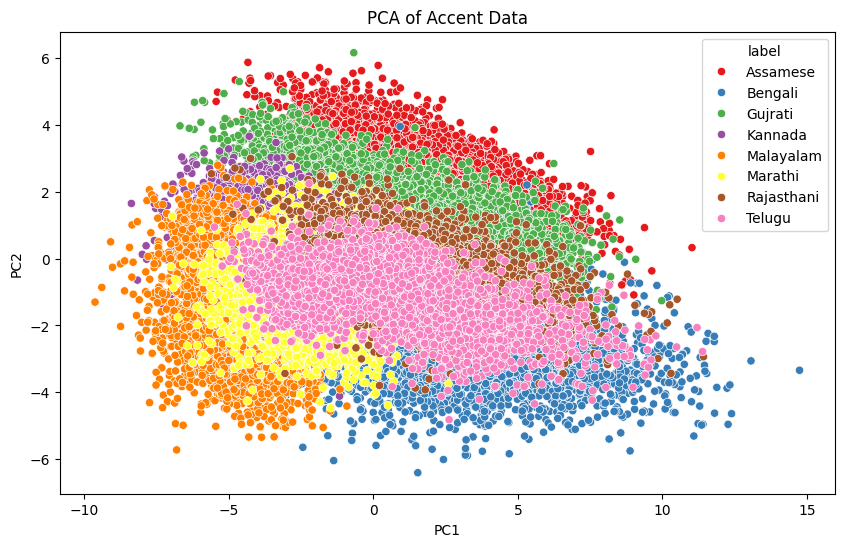

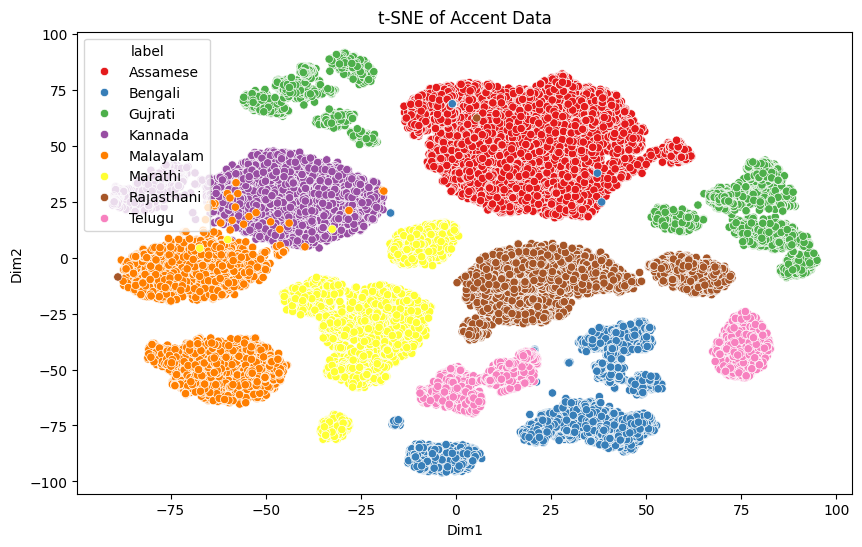

In [7]:
# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='Set1')
plt.title('PCA of Accent Data')
plt.show()

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000)
tsne_result = tsne.fit_transform(X_scaled)

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2'])
tsne_df['label'] = y

# Plotting the t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dim1', y='Dim2', hue='label', data=tsne_df, palette='Set1')
plt.title('t-SNE of Accent Data')
plt.show()

Evaluating SVM...
Accuracy: 0.9968
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8513
           1       1.00      1.00      1.00      4197
           2       1.00      1.00      1.00      4670
           3       0.99      1.00      0.99      5406
           4       1.00      0.99      0.99      5132
           5       1.00      1.00      1.00      5059
           6       1.00      1.00      1.00      4933
           7       0.99      0.99      0.99      2969

    accuracy                           1.00     40879
   macro avg       1.00      1.00      1.00     40879
weighted avg       1.00      1.00      1.00     40879

Confusion Matrix:


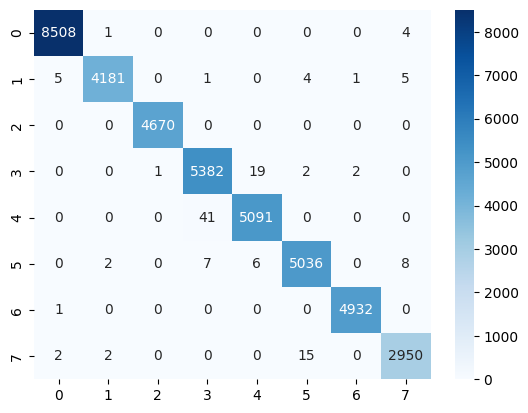

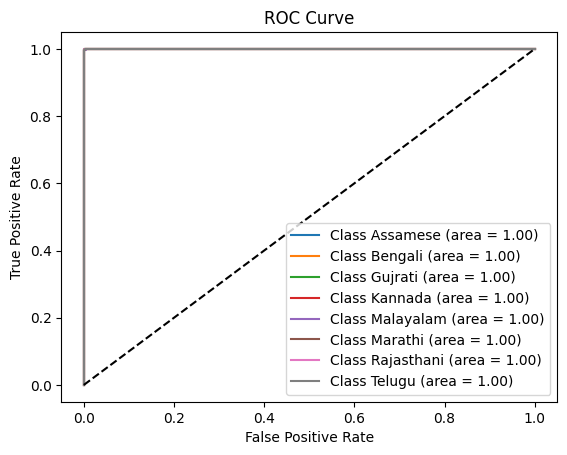

Evaluating Logistic Regression...
Accuracy: 0.9815
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8513
           1       0.99      0.98      0.98      4197
           2       1.00      1.00      1.00      4670
           3       0.98      0.98      0.98      5406
           4       0.98      0.98      0.98      5132
           5       0.95      0.96      0.95      5059
           6       1.00      1.00      1.00      4933
           7       0.93      0.91      0.92      2969

    accuracy                           0.98     40879
   macro avg       0.98      0.98      0.98     40879
weighted avg       0.98      0.98      0.98     40879

Confusion Matrix:


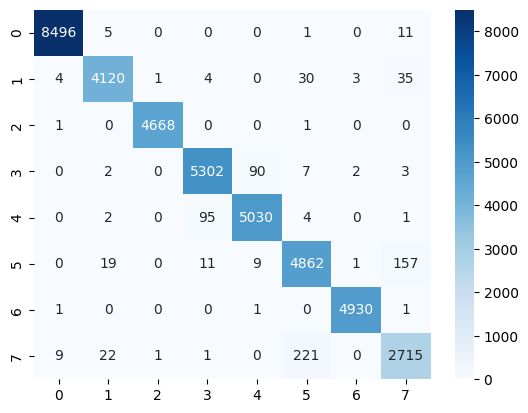

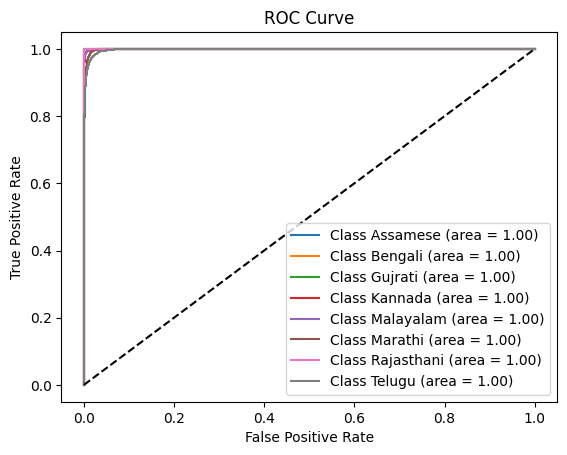

Evaluating Random Forest...
Accuracy: 0.9930
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8513
           1       1.00      0.99      0.99      4197
           2       1.00      1.00      1.00      4670
           3       0.98      0.99      0.99      5406
           4       0.99      0.98      0.99      5132
           5       0.99      1.00      0.99      5059
           6       1.00      1.00      1.00      4933
           7       0.99      0.98      0.99      2969

    accuracy                           0.99     40879
   macro avg       0.99      0.99      0.99     40879
weighted avg       0.99      0.99      0.99     40879

Confusion Matrix:


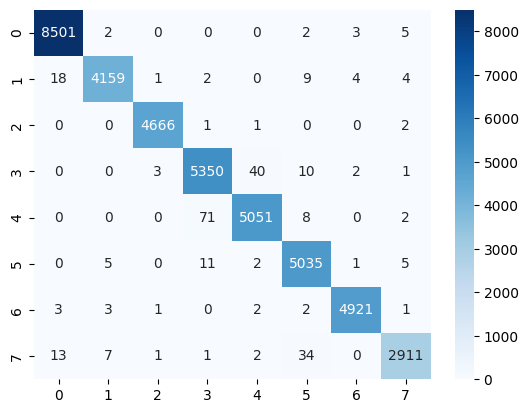

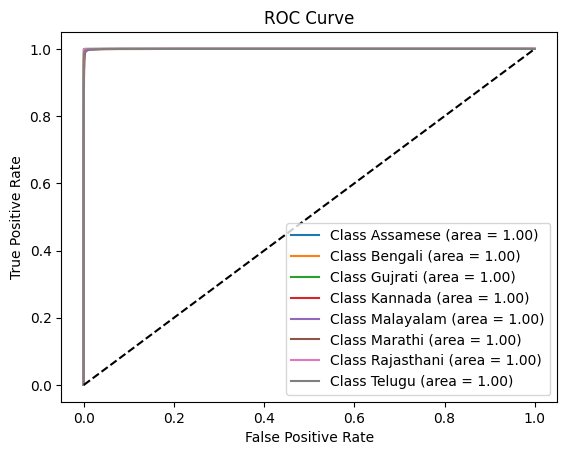

Evaluating Decision Tree...
Accuracy: 0.9644
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8513
           1       0.96      0.96      0.96      4197
           2       0.99      0.99      0.99      4670
           3       0.96      0.95      0.95      5406
           4       0.96      0.96      0.96      5132
           5       0.95      0.96      0.95      5059
           6       0.97      0.97      0.97      4933
           7       0.91      0.93      0.92      2969

    accuracy                           0.96     40879
   macro avg       0.96      0.96      0.96     40879
weighted avg       0.96      0.96      0.96     40879

Confusion Matrix:


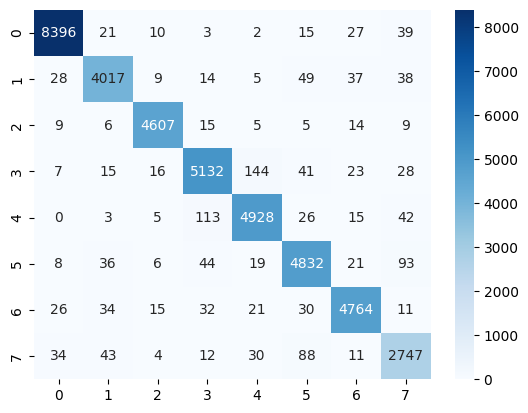

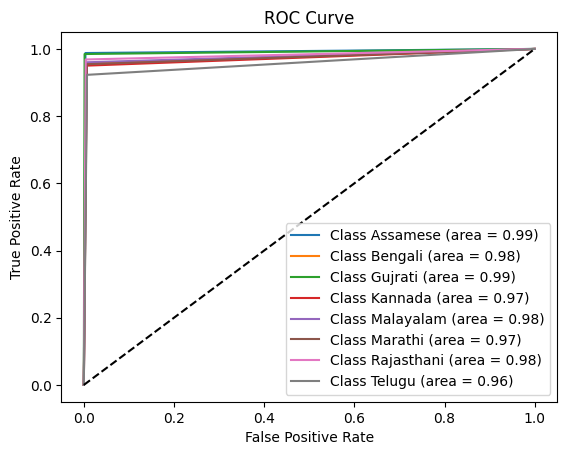

Evaluating XGBoost...
Accuracy: 0.9946
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8513
           1       1.00      0.99      0.99      4197
           2       1.00      1.00      1.00      4670
           3       0.99      0.99      0.99      5406
           4       0.99      0.99      0.99      5132
           5       0.99      1.00      0.99      5059
           6       1.00      1.00      1.00      4933
           7       0.99      0.99      0.99      2969

    accuracy                           0.99     40879
   macro avg       0.99      0.99      0.99     40879
weighted avg       0.99      0.99      0.99     40879

Confusion Matrix:


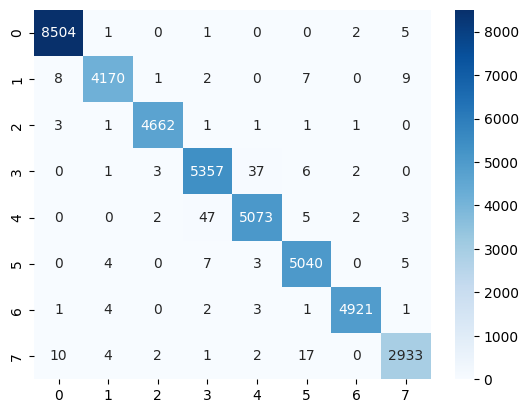

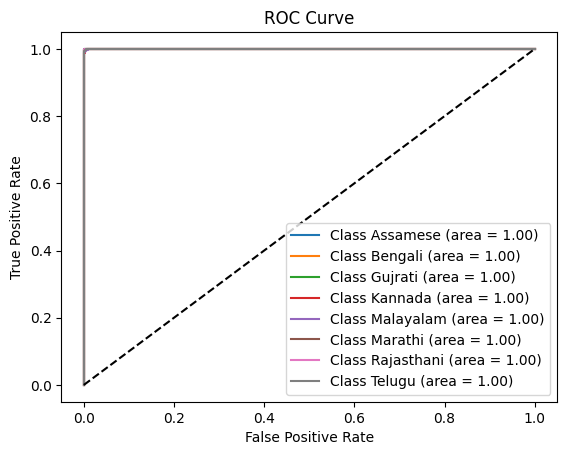

In [6]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize k-fold cross-validation with stratification
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize models
models = {
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Function to evaluate models
def evaluate_model(model_pipeline, X, y, kf):
    y_pred = cross_val_predict(model_pipeline, X, y, cv=kf)
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    # ROC Curve and AUC
    if hasattr(model_pipeline, "predict_proba"):
        y_prob = cross_val_predict(model_pipeline, X, y, cv=kf, method='predict_proba')
    else:
        y_prob = cross_val_predict(model_pipeline, X, y, cv=kf, method='decision_function')

    # Compute ROC curve and AUC for each class
    n_classes = len(label_encoder.classes_)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y, y_prob[:, i], pos_label=i)
        roc_auc = roc_auc_score(y == i, y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Evaluate each model using a pipeline to avoid data leakage
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Create a pipeline for each model
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling inside the pipeline
        ('pca', PCA(n_components=10)),  # Optional: Include PCA if dimensionality reduction is needed
        ('model', model)  # Model goes here
    ])
    
    evaluate_model(model_pipeline, X, y_encoded, kf)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone

def prepare_data(data_path):
    """
    Load and prepare data for modeling.
    Replace this function with your actual data loading logic.
    """
    # Load your data
    # Example: df = pd.read_csv(data_path)
    
    # Separate features and target
    # Example:
    # X = df.drop('target_column', axis=1)
    # y = df['target_column']
    
    # Convert to numpy arrays if needed
    # X = X.to_numpy()
    # y = y.to_numpy()
    
    return X, y

def evaluate_model(model_pipeline, X, y, groups, kf):
    # Lists to store metrics for each fold
    fold_accuracies = []
    fold_predictions = []
    fold_true_values = []
    fold_probabilities = []
    
    # Keep track of used indices to verify no overlap
    all_test_indices = set()
    
    print("\nStarting group k-fold cross validation evaluation...")
    
    # Perform group k-fold cross validation
    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y, groups=groups), 1):
        # Verify no overlap in test sets
        test_indices_set = set(test_idx)
        if any(idx in all_test_indices for idx in test_indices_set):
            raise ValueError("Test set overlap detected!")
        all_test_indices.update(test_indices_set)
        
        # Split data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Clone the pipeline for each fold
        fold_pipeline = clone(model_pipeline)
        
        # Fit the pipeline
        fold_pipeline.fit(X_train, y_train)
        
        # Get predictions
        y_pred = fold_pipeline.predict(X_test)
        fold_predictions.extend(y_pred)
        fold_true_values.extend(y_test)
        
        # Calculate and store accuracy for this fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(fold_accuracy)
        
        # Get probability predictions if available
        if hasattr(fold_pipeline, "predict_proba"):
            y_prob = fold_pipeline.predict_proba(X_test)
        else:
            y_prob = fold_pipeline.decision_function(X_test)
            # Reshape decision function output for binary classification
            if len(y_prob.shape) == 1:
                y_prob = np.column_stack([-y_prob, y_prob])
        fold_probabilities.extend(y_prob)
        
        print(f"\nFold {fold} Results:")
        print(f"Fold Accuracy: {fold_accuracy:.4f}")
        print(f"Test set size: {len(test_idx)}")
        print("\nClassification Report for this fold:")
        print(classification_report(y_test, y_pred))
        
        # Plot confusion matrix for this fold
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - Fold {fold}')
        plt.show()
    
    # Calculate and display average metrics
    print("\nOverall Results:")
    print(f"Average Accuracy across folds: {np.mean(fold_accuracies):.4f} (±{np.std(fold_accuracies):.4f})")
    print("\nOverall Classification Report:")
    print(classification_report(fold_true_values, fold_predictions))
    
    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    fold_probabilities = np.array(fold_probabilities)
    fold_true_values = np.array(fold_true_values)
    
    # Compute ROC curve and AUC for each class
    n_classes = len(np.unique(y))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(fold_true_values == i, fold_probabilities[:, i])
        roc_auc = roc_auc_score(fold_true_values == i, fold_probabilities[:, i])
        plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (All Folds Combined)')
    plt.legend(loc='best')
    plt.show()

def main():
    # Load and prepare your data
    X, y = prepare_data("your_data_path.csv")  # Replace with your data path
    
    # Encode labels if needed
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Create groups to ensure no data overlap
    n_samples = len(y_encoded)
    groups = np.arange(n_samples)
    
    # Initialize group k-fold cross-validation
    kf = GroupKFold(n_splits=10)
    
    # Initialize models
    models = {
        'SVM': SVC(probability=True),
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss')
    }
    
    # Evaluate each model using a pipeline
    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Create a pipeline for each model
        model_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=10)),
            ('model', model)
        ])
        
        evaluate_model(model_pipeline, X, y_encoded, groups, kf)

# Usage example:
if _name_ == "_main_":
    # To use this code, you need to:
    # 1. Replace the prepare_data function with your actual data loading logic
    # 2. Specify the correct path to your data
    # main()
    pass

NameError: name '_name_' is not defined